# **Classification model on Cencus Income Dataset**
* Problem Statement : Prediction task is to determine whether a person makes over 50K a
year

**Steps**
1. Data Injection
  * Data Profiling
  * Basic Operations
  * Data Cleaning
  * Analysis of features and Statistical Analysis
2. EDA
  * Univariate Analysis
  * Bivariate Analysis
  * Multivariate Analysis

3. Pre-processing
  * Dropping null values
  * Mapping
  * Feature Encoding
  * Spliting of categorical and numerical variable
  * Train-Test split
  * Scaling

4. Model Creation
  * Decision Tree Classifier
  * HyperParameter Tuning : Decision Tree Classifier
  * Bagging Classifier
  * Hyperparameter tuning : Bagging Classifier
  * Random Forest Classifier
  * Hyperparameter tuning : Random Forest Classifier
  * Extra Trees Classifier
  * HyperParameter Tuning : Extra Tree Classifier
  * Voting Classifier
  * hard_voting
  * soft_voting
5. Evaluation
  * Accuracy Score
  * Roc-auc score
  * Precision        
  * Recall
  * F1_Score
  * AUC

**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

# **1. Data injection**
**Complete dataset is available on my GitHub**
* GitHub Link: https://github.com/subhashdixit/Support_Vector_Machines/tree/main/SVC/Census_Income_Classification

In [2]:
url_train = 'https://raw.githubusercontent.com/subhashdixit/Support_Vector_Machines/main/SVC/Census_Income_Classification/adult_data.csv'
url_test = 'https://raw.githubusercontent.com/subhashdixit/Support_Vector_Machines/main/SVC/Census_Income_Classification/adult_test.csv' 
df_train = pd.read_csv(url_train, header = None)
df_test = pd.read_csv(url_test, header = None, skiprows = 1)

## **Data Profiling**

In [3]:
df = pd.concat([df_train,df_test])

**Resetting the index**
* Added a column named 'index' with index value to get data in sequence and dropping the index column as it is not required further

In [4]:
df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)

In [5]:
rename_columns = {0 : 'age', 1 : 'workclass', 2 : 'fnlwgt', 3 : 'education', 4 : 'education-num', 5 : 'marital-status', 6 : 'occupation',
                  7 : 'relationship', 8 : 'race', 9 : 'sex', 10 : 'capital-gain', 11 : 'capital-loss', 12 : 'hours-per-week',
                  13 : 'native-country', 14 : 'class'}
df.rename(columns = rename_columns, inplace = True)

* **Took 1000 sample due to memory issue in my laptop because Random Forest Algorithm takes long to run**

In [6]:
df = df.sample(n = 1000)

## **Basic Operations**

In [7]:
df.shape

(1000, 15)

In [8]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'class'],
      dtype='object')

## **Data Cleaning**

**Data Set Information:**

Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

Prediction task is to determine whether a person makes over 50K a year.


**Attribute Information:**

**Listing of attributes:**

>50K, <=50K.

1. age: continuous
2. workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, 3. State-gov, Without-pay, Never-worked.
4. fnlwgt: continuous.
5. education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, 6. Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
7. education-num: continuous.
8. marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
9. occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
10. relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
11. race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
12. sex: Female, Male.
13. capital-gain: continuous.
14. capital-loss: continuous.
15. hours-per-week: continuous.
16. native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [9]:
df_clean = df.copy()

In [10]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
class             object
dtype: object

In [11]:
df.duplicated().sum()

0

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.duplicated().sum()

0

In [14]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 32212 to 13357
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             1000 non-null   int64 
 1   workclass       1000 non-null   object
 2   fnlwgt          1000 non-null   int64 
 3   education       1000 non-null   object
 4   education-num   1000 non-null   int64 
 5   marital-status  1000 non-null   object
 6   occupation      1000 non-null   object
 7   relationship    1000 non-null   object
 8   race            1000 non-null   object
 9   sex             1000 non-null   object
 10  capital-gain    1000 non-null   int64 
 11  capital-loss    1000 non-null   int64 
 12  hours-per-week  1000 non-null   int64 
 13  native-country  1000 non-null   object
 14  class           1000 non-null   object
dtypes: int64(6), object(9)
memory usage: 125.0+ KB


In [16]:
for i in df.columns:
  print(f"{i} : {df[i].unique()}")

age : [45 53 30 48 37 39 23 49 36 33 41 31 47 22 19 44 51 24 43 42 20 18 38 55
 29 26 28 17 59 27 34 21 56 63 25 57 40 60 54 71 46 35 52 32 50 70 74 66
 73 58 76 62 77 65 84 61 64 72 75 68 67 90 69]
workclass : [' Private' ' Federal-gov' ' State-gov' ' Self-emp-not-inc' ' Local-gov'
 ' Self-emp-inc' ' ?']
fnlwgt : [ 178416  167380  175990  267281  197731  197947  118023  150566   86143
  172232  101320  101299  185177  164309  198237  127768  148015  116892
  150309  344329   51471  228372  240063  387215  187164   24790  251730
   61791  163606  226902  142573  203828   66173  161745  176716  281356
  240747  277946  236013  116580   83774  381741  161558   50197  235909
  211601  103628  169076  305619  152129  191893   46492  236684  157217
  197200  261725  257250  154078  133201  259785  146651  138416  341954
  430554   81648  207564  213152  460835   60001  166248  180758   67006
  197369  259585  186809  209808  363192  199227  209317  237920  203408
  262681   33046  255406  1

**Segregating Categorical and Numerical Variables**

In [17]:
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
numerical_features = [feature for feature in df.columns if df[feature].dtypes !='O']
categorical_features.append('education-num')
numerical_features.remove('education-num')

**Replace '?' with blank in the class feature**

In [18]:
df['class'] = df['class'].apply(lambda x: x.replace('.',''))

**Remove extra space from the column name**

In [19]:
df.columns = df.columns.str.strip()

**Remove extra space from the data**

In [20]:
df = df.applymap(lambda x: " ".join(x.split()) if isinstance(x, str) else x)

**Replace '?' with most mode value**

In [21]:
for impure_col in ["workclass", "native-country", "occupation"]:
 frequent_value = df[impure_col].mode()[0]
 df[impure_col] = df[impure_col].replace(['?'], frequent_value)

**Check whether '?' is present or not in the dataset**

In [22]:
df[(df['workclass'] == '?') | (df['native-country'] == '?') | (df['occupation'] == '?')].sum()

age               0.0
workclass         0.0
fnlwgt            0.0
education         0.0
education-num     0.0
marital-status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
capital-gain      0.0
capital-loss      0.0
hours-per-week    0.0
native-country    0.0
class             0.0
dtype: float64

In [23]:
print(f"Duplicates : {df.duplicated().sum()}\n Null Values : {df.isnull().sum()}")

Duplicates : 0
 Null Values : age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64


In [24]:
df.drop_duplicates(inplace = True)

In [25]:
print(f"Duplicates : {df.duplicated().sum()}\n Null Values : {df.isnull().sum()}")

Duplicates : 0
 Null Values : age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64


## **Analysis of Features**

### **Analysis of Numerical Features**

In [26]:
for col in numerical_features:
  print(f"{col} : {df[col].value_counts()}")

age : 31    40
30    32
23    32
45    30
46    30
      ..
74     2
84     1
75     1
90     1
71     1
Name: age, Length: 63, dtype: int64
fnlwgt : 59496     2
167536    2
101077    2
186299    2
49469     2
         ..
57151     1
181153    1
242861    1
125905    1
34361     1
Name: fnlwgt, Length: 985, dtype: int64
capital-gain : 0        922
7298      10
7688       9
15024      9
3103       7
4386       4
3818       3
3325       3
99999      3
5178       3
20051      2
3464       2
2176       2
2105       2
10520      1
5013       1
1111       1
10605      1
6418       1
27828      1
2036       1
2174       1
4064       1
2463       1
1409       1
1151       1
13550      1
4416       1
14344      1
2407       1
6497       1
2885       1
8614       1
Name: capital-gain, dtype: int64
capital-loss : 0       944
1902      8
1887      5
1977      4
1740      3
1741      3
2444      2
1590      2
1974      2
2051      2
1848      2
1564      2
1721      2
1980      2
1573      1
1340  

### **Analysis of Categorical Features**

In [27]:
for col in categorical_features:
  print("---------------------------")
  print(f"{col} :\n{df[col].value_counts()}")

---------------------------
workclass :
Private             750
Self-emp-not-inc     86
Local-gov            63
State-gov            39
Federal-gov          33
Self-emp-inc         29
Name: workclass, dtype: int64
---------------------------
education :
HS-grad         324
Some-college    219
Bachelors       164
Masters          52
Assoc-voc        49
Assoc-acdm       38
11th             33
Prof-school      27
7th-8th          22
10th             21
9th              19
5th-6th          12
12th              8
Doctorate         7
Preschool         4
1st-4th           1
Name: education, dtype: int64
---------------------------
marital-status :
Married-civ-spouse       453
Never-married            342
Divorced                 123
Separated                 41
Widowed                   23
Married-spouse-absent     17
Married-AF-spouse          1
Name: marital-status, dtype: int64
---------------------------
occupation :
Prof-specialty       194
Exec-managerial      125
Adm-clerical         1

# **2. EDA**

## **Statistical Analysis**

**Correlation**

In [28]:
df[numerical_features].corr()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.091191,0.085639,0.044489,0.074960
fnlwgt,-0.091191,1.000000,0.059043,-0.018593,-0.052508
capital-gain,0.085639,0.059043,1.000000,-0.034048,0.024500
capital-loss,0.044489,-0.018593,-0.034048,1.000000,0.053015
hours-per-week,0.074960,-0.052508,0.024500,0.053015,1.000000


**Covariance**

In [29]:
df[numerical_features].cov()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
age,187.566490,-1.320833e+05,6.960373e+03,269.732306,12.950853
fnlwgt,-132083.250515,1.118501e+10,3.705692e+07,-870514.590755,-70054.680653
capital-gain,6960.372833,3.705692e+07,3.521791e+07,-89449.240531,1834.159990
capital-loss,269.732306,-8.705146e+05,-8.944924e+04,195978.785384,296.071298
hours-per-week,12.950853,-7.005468e+04,1.834160e+03,296.071298,159.140211


## **Univariate Analysis**

### **Numerical Features**

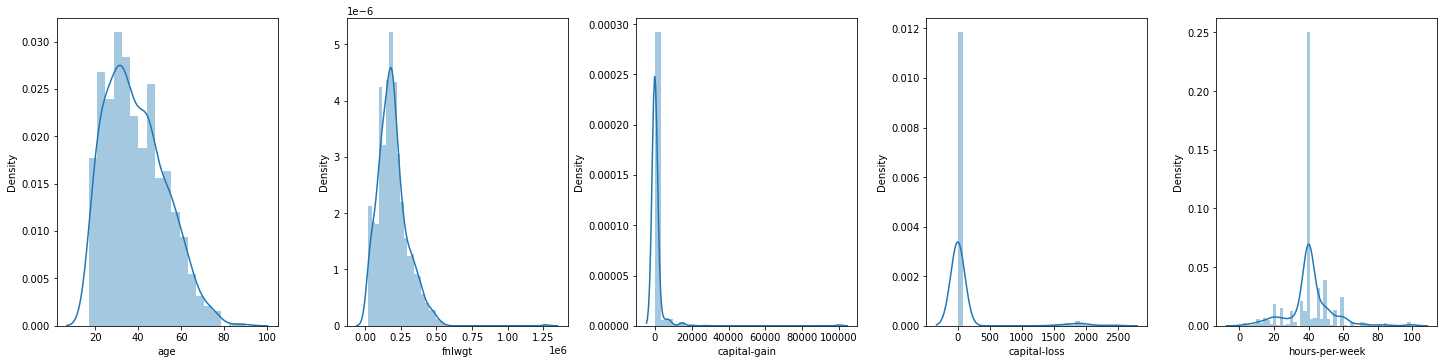

In [30]:
fig, ax = plt.subplots(ncols = 5, nrows = 1, figsize=(20,5))
index = 0
ax = ax.flatten()
for col, value in df[numerical_features].items():
  sns.distplot(value, ax=ax[index])
  index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

### **Categorical Features**

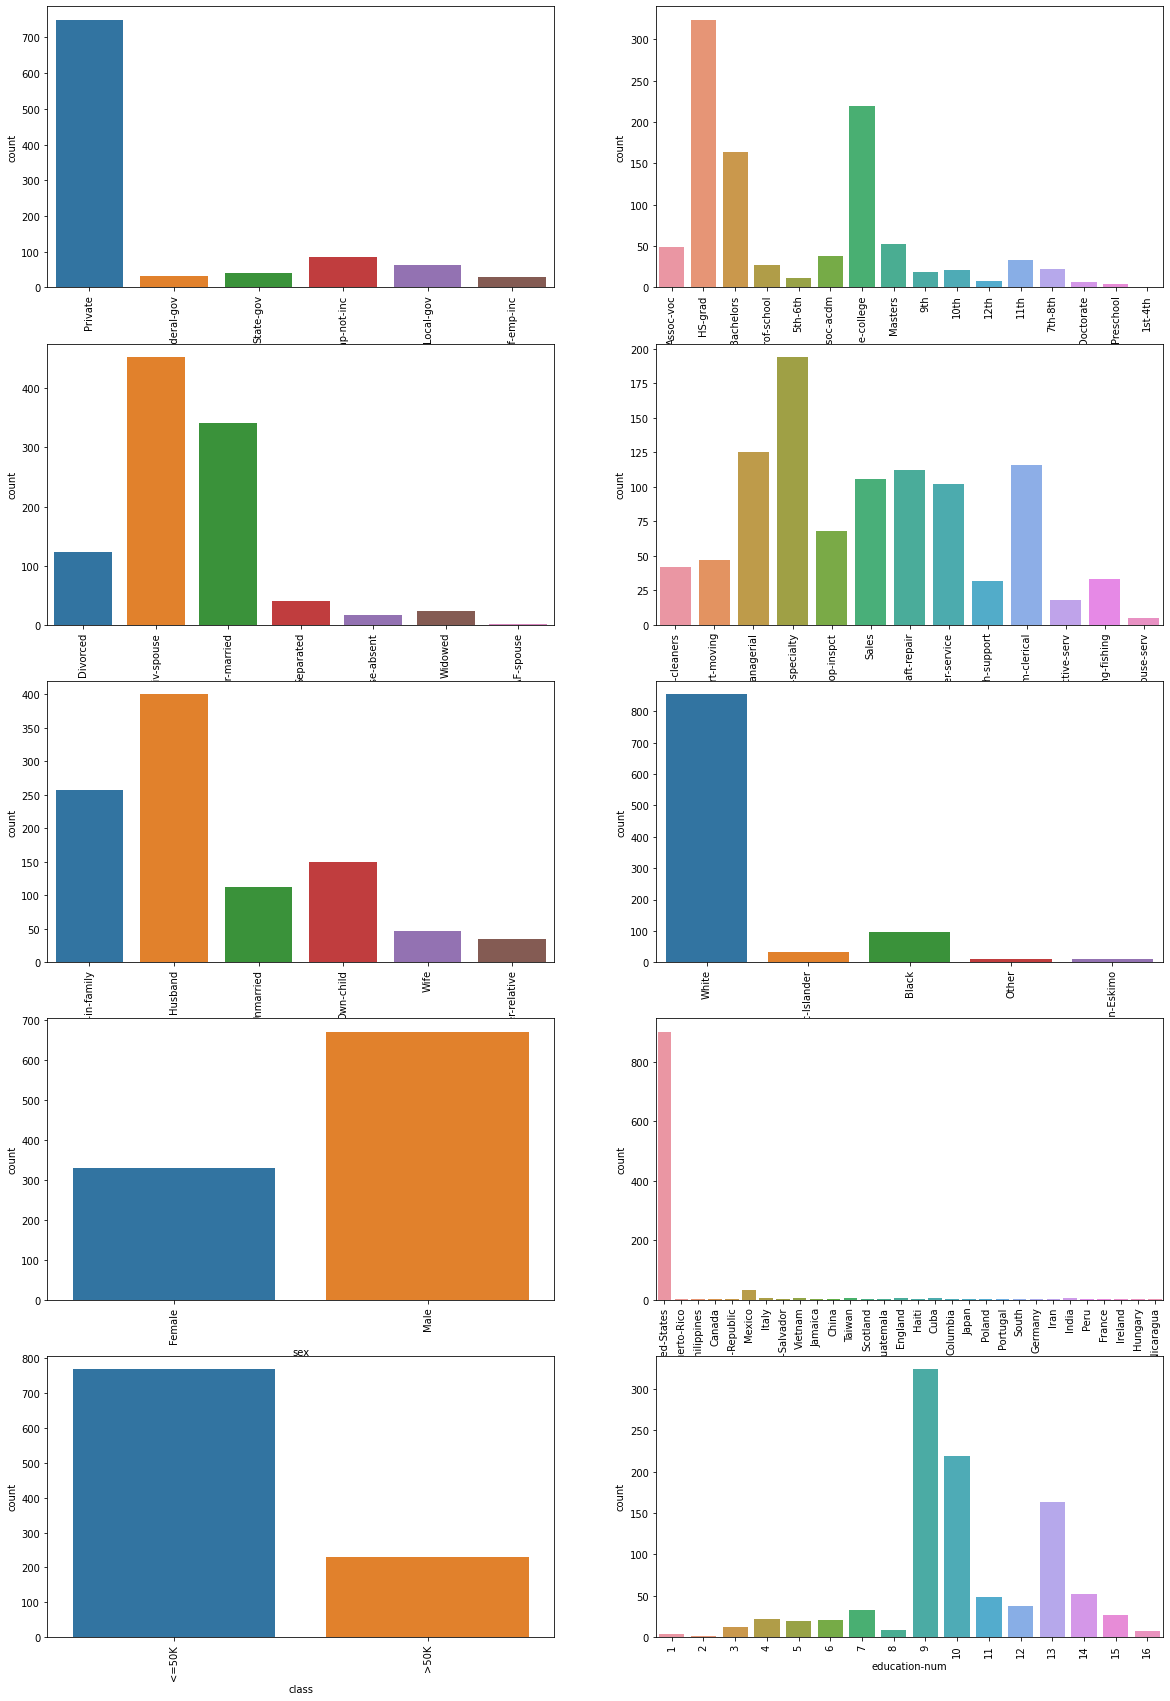

In [31]:
fig, ax = plt.subplots(ncols = 2, nrows = 5, figsize = (20,30))
plt.rcParams["figure.autolayout"] = True
index = 0
ax = ax.flatten()
for col, value in df[categorical_features].items():
  g = sns.countplot(value, ax=ax[index])
  g.set_xticklabels(g.get_xticklabels(), rotation = 90) 
  index += 1


## **Biivariate Analysis**

### **Numerical Features**

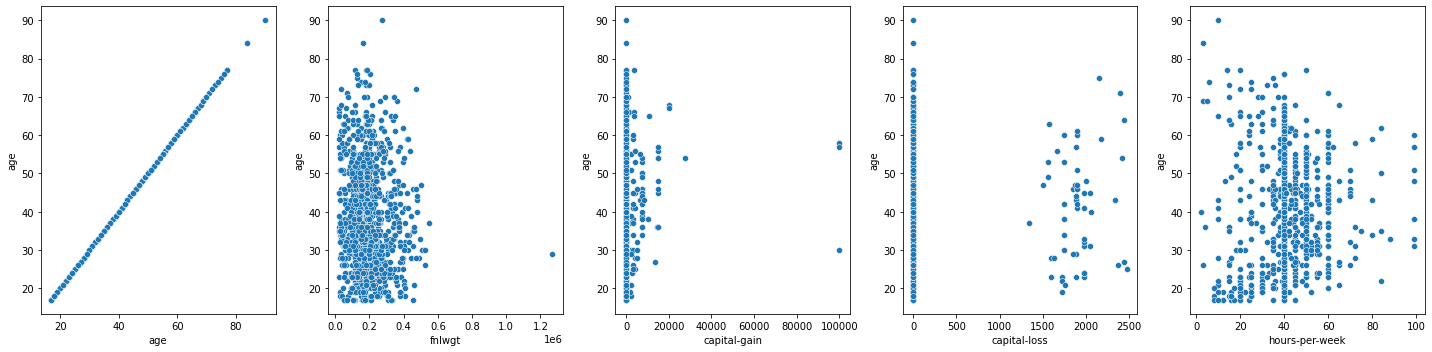

In [32]:
fig, ax = plt.subplots(ncols = 5, nrows = 1, figsize=(20,5))
index = 0
ax = ax.flatten()
for col, value in df[numerical_features].items():
  sns.scatterplot(df[col], df['age'], ax=ax[index])
  index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

### **Categorical Features**

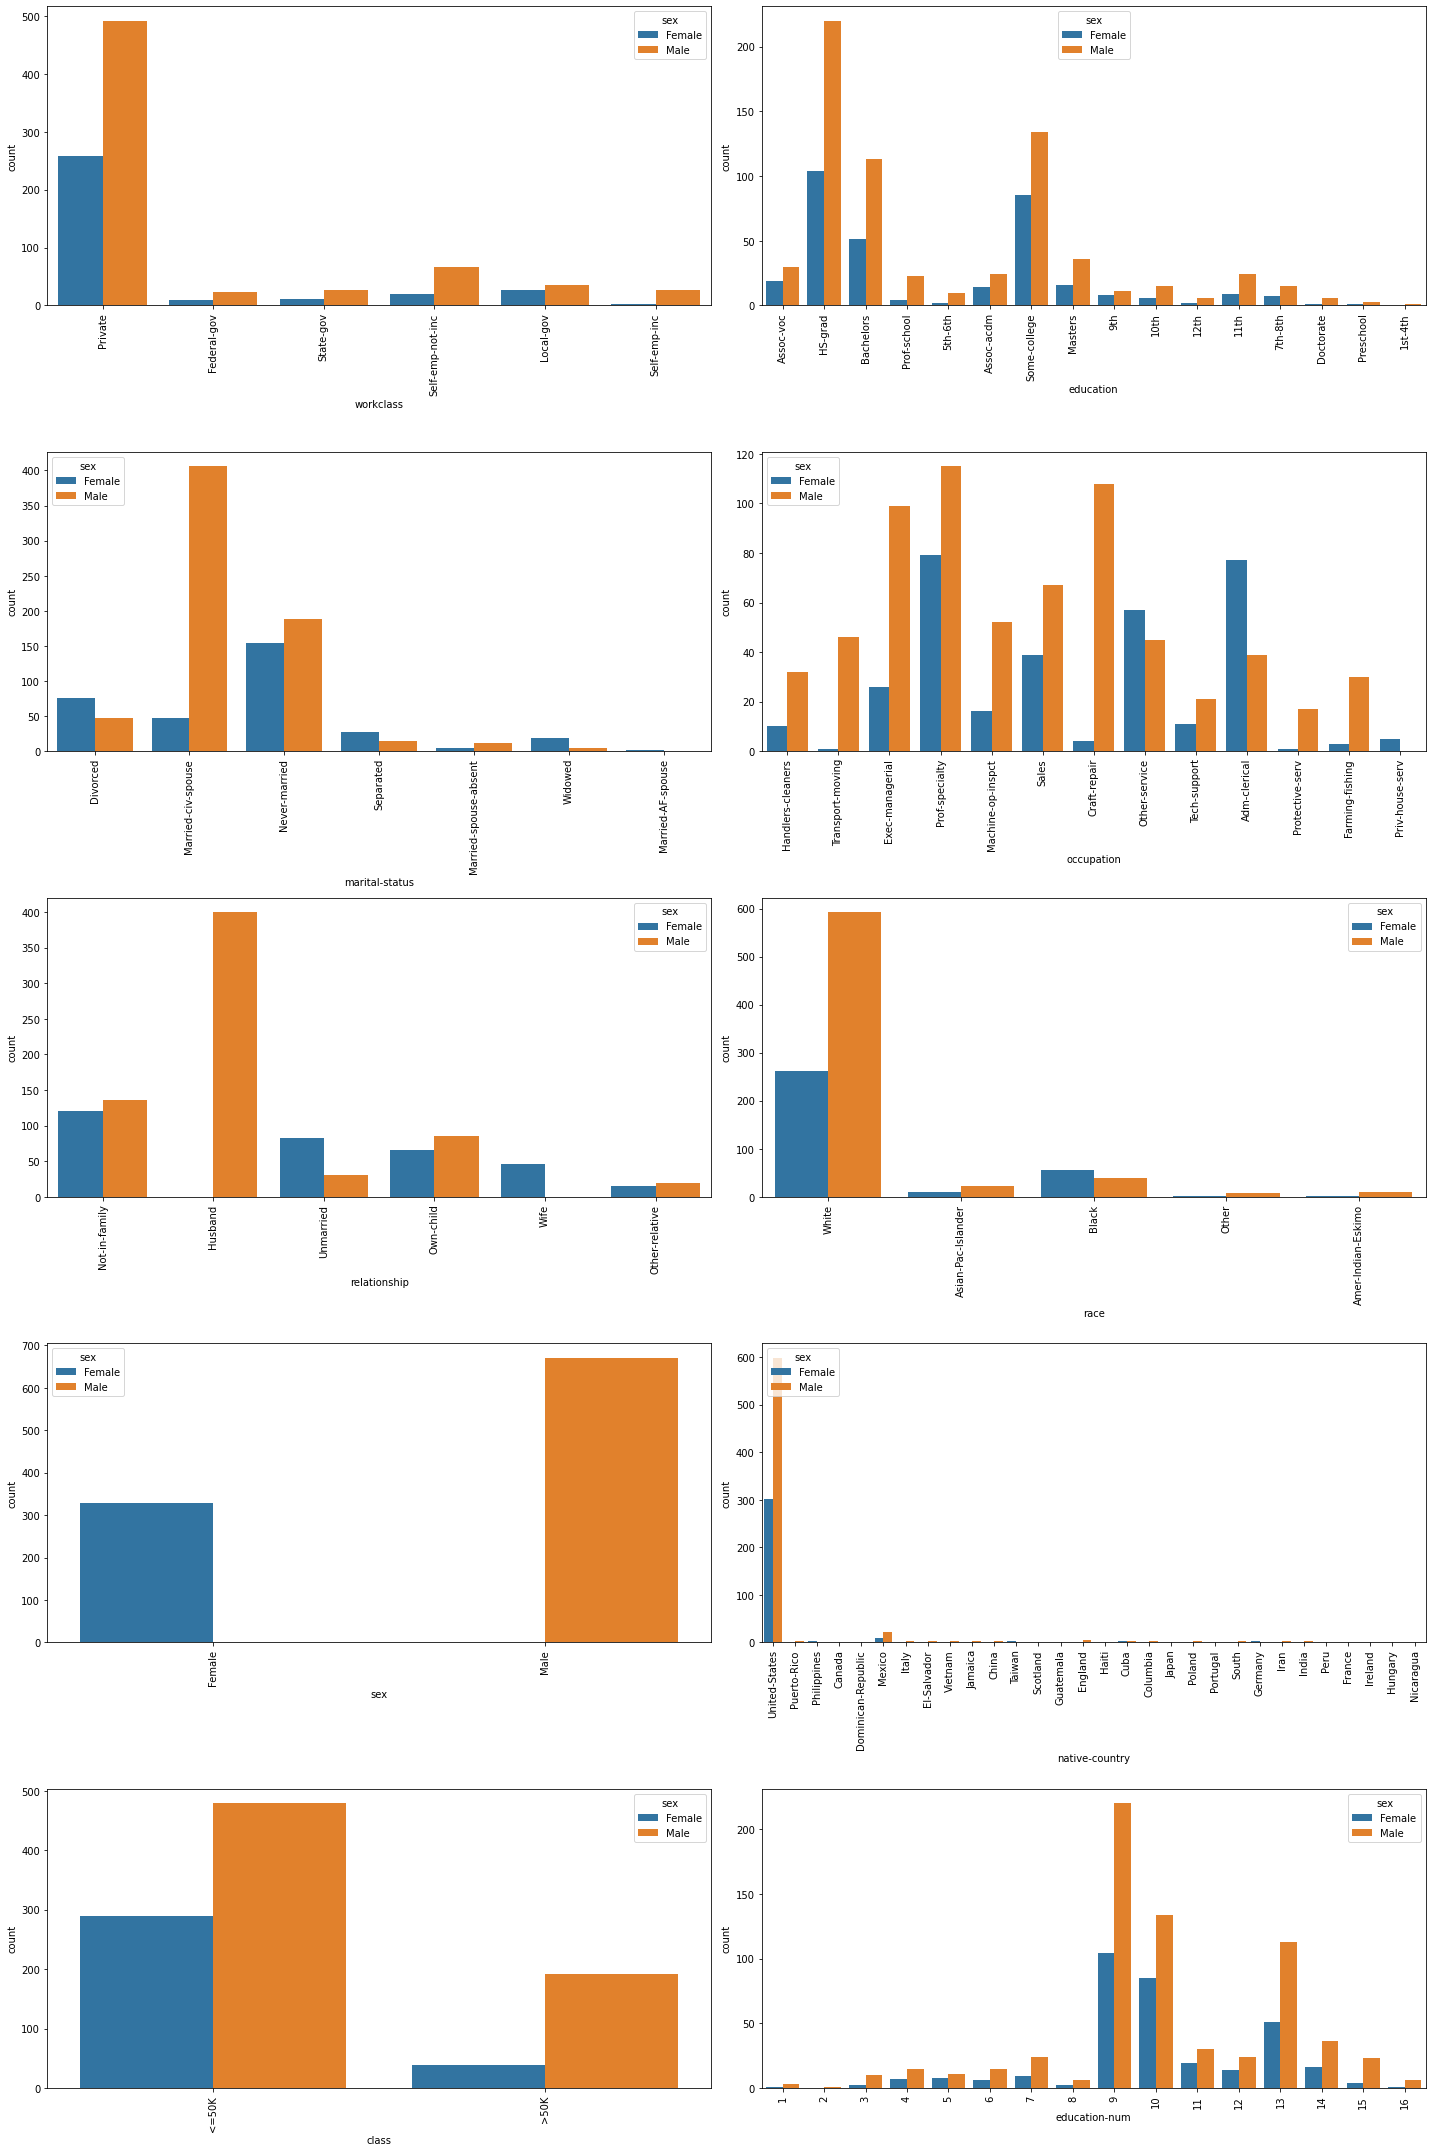

In [33]:
fig, ax = plt.subplots(ncols = 2, nrows = 5, figsize = (20,30))
plt.rcParams["figure.autolayout"] = True
index = 0
ax = ax.flatten()
for col, value in df[categorical_features].items():
  g = sns.countplot(x = col, data = df , hue = 'sex', ax=ax[index])
  g.set_xticklabels(g.get_xticklabels(), rotation = 90) 
  index += 1

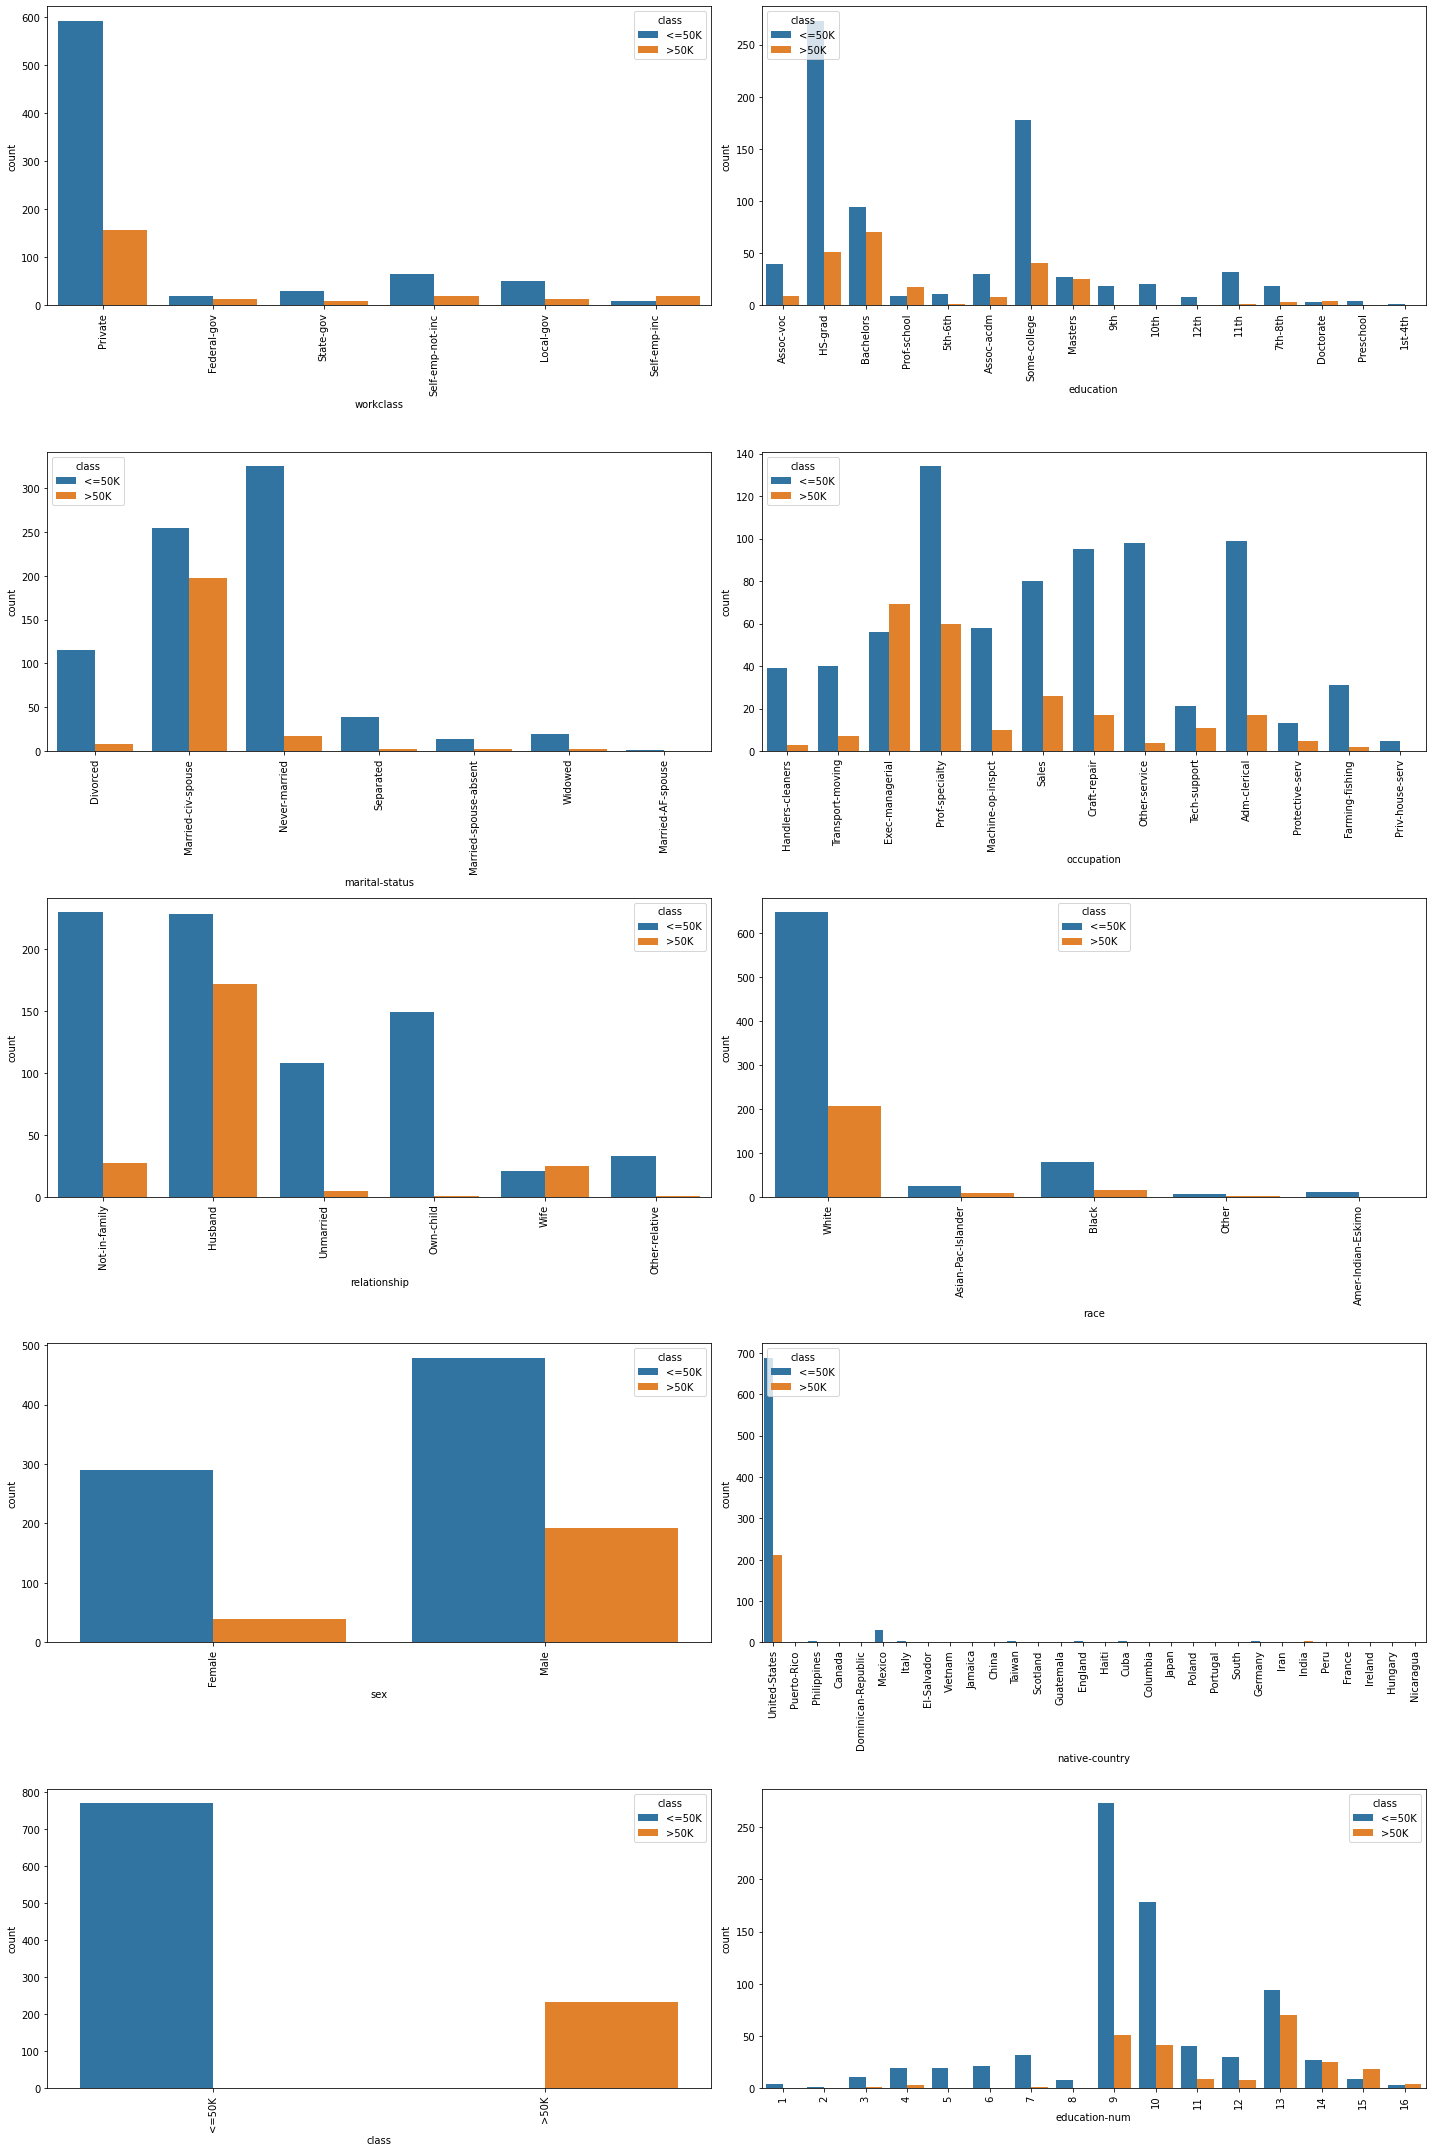

In [34]:
fig, ax = plt.subplots(ncols = 2, nrows = 5, figsize = (20,30))
plt.rcParams["figure.autolayout"] = True
index = 0
ax = ax.flatten()
for col, value in df[categorical_features].items():
  g = sns.countplot(x = col, data = df , hue = 'class', ax=ax[index])
  g.set_xticklabels(g.get_xticklabels(), rotation = 90) 
  index += 1

## **Multivariate Analysis**

### **Numerical Features**

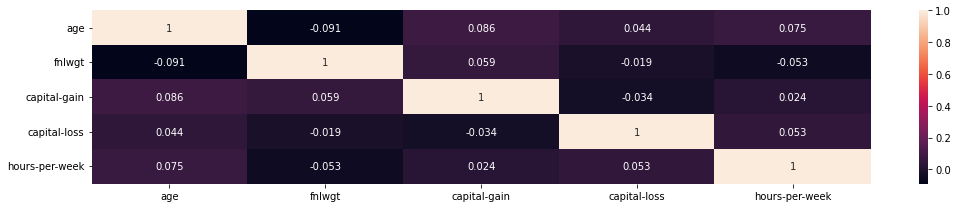

In [35]:
plt.figure(figsize = (15,3))
sns.heatmap(data = df[numerical_features].corr(), annot=True)

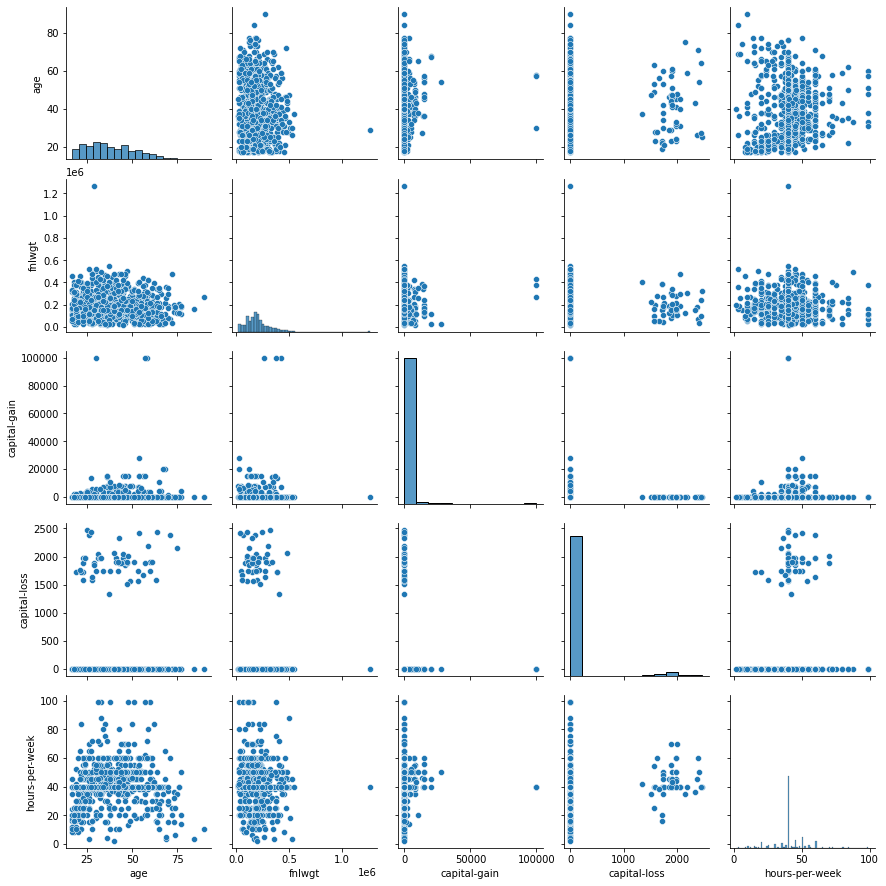

In [36]:
sns.pairplot(df[numerical_features])

In [37]:
# for feature in continuous_features:
#  plt.figure(figsize=(10,5))
#  plt.subplot(121)
#  sns.histplot(data=df_eda, x=feature, kde=True, bins=30)
#  plt.title(f"{feature}'s distribution", fontweight='bold')
#  plt.subplot(122)
#  stats.probplot(df_eda[feature], dist='norm', plot=plt)
#  plt.title(f"{feature}'s Q-Q plot", fontweight='bold')
#  plt.show()

# pplot(iris, x="petal_length", y="sepal_length", kind='qq')
# fig, ax = plt.subplots(ncols = 5, nrows = 1, figsize=(20,5))
# index = 0
# ax = ax.flatten()
# for col, value in df[numerical_features].items():
#   sns.stripplot(data = df, y = df[col], x='class', ax=ax[index])
#   stats.probplot(df_eda[feature], dist='norm', plot=plt)
#   index += 1
# plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

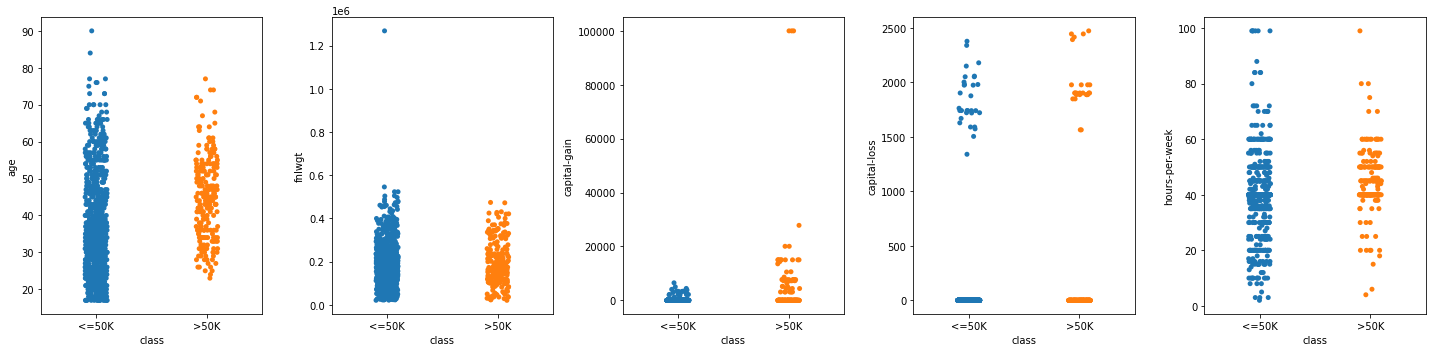

In [38]:
fig, ax = plt.subplots(ncols = 5, nrows = 1, figsize=(20,5))
index = 0
ax = ax.flatten()
for col, value in df[numerical_features].items():
  sns.stripplot(data = df, y = df[col], x='class', ax=ax[index])
  index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

### **Categorical Features**

# **3. Preprocessing**

In [39]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64

## **Mapping**

**Reduce number of catgeory in marital-status**

In [40]:
df['marital-status'] = df['marital-status'].map({'Never-married' : 'Single', 'Married-civ-spouse' : 'Married',  
                  'Married-spouse-absent' : 'Married','Married-AF-spouse' : 'Married', 'Divorced' : 'Divorced',
                  'Separated' : 'Separated', 'Widowed' : 'Widowed'})

**Reduce number of catgeory in workclass**

In [41]:
df['workclass'] = df['workclass'].map({'State-gov' : 'Government', 'Self-emp-not-inc' : 'Self_Employed',
             'Private' : 'Private', 'Federal-gov' : 'Government', 'Local-gov' : 'Government',
            'Self-emp-inc' : 'Self_Employed', 'Without-pay' : 'Not_Working', 'Never-worked' : 'Not_Working'})

In [42]:
df['sex'].unique()

array(['Female', 'Male'], dtype=object)

**Map Male to  1 and Female to 0**

In [43]:
df['sex'] = df['sex'].map({'Male' : 1, 'Female' : 0})

**Map ">50K" to  1 and "<=50K" to 0**

In [44]:
df['class'] = df['class'].map({'>50K' : 1, '<=50K' : 0})

## **Frequency Encoding**

In [45]:
for col in ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'native-country']:
  # df['workclass'] = df['workclass'].map(df.groupby("workclass").size()/len(df)).round(2)
  df[col] = df[col].map(df.groupby(col).size()/len(df)).round(2)

**Drop "education" column because we have one more columns as "eduction-num" which is encoded to "eductaion" column**

In [46]:
df.drop('education', axis = 1, inplace = True)

## **Spliting Independent and Dependent Features**

In [47]:
X = df.iloc[:, 0:13]
y= df.iloc[:, -1]

## **Train Test Split**

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=7,test_size=0.33)

## **Scaling**
* **Some algoriithms need scaling and some doesn't**

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
scaler=StandardScaler()

In [52]:
X_train_Scaled = scaler.fit_transform(X_train)

In [53]:
X_test_Scaled = scaler.transform(X_test)

# **4. Model Creation**

## **All Model Creation**

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
# Evaluation Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
# Plots
from sklearn import tree

In [55]:
'''Hyperparameters of Decision Tree Classifier'''
DTC_parameters = {
 'criterion' : ['gini', 'entropy', 'log_loss'],
 'splitter' : ['best', 'random'],
 'max_depth' : range(1,10,1),
 'min_samples_split' : range(2,10,2),
 'min_samples_leaf' : range(1,5,1),
 'max_features' : ['auto', 'sqrt', 'log2']
}

'''Hyperparameters of Bagging Classifier'''
Bagging_parameters = {
 'n_estimators' : [5, 10, 15],
 'max_samples' : range(2, 10, 1),
 'max_features' : range(2, 10, 3)
}

'''Hyperparameters of Random Forest Classifier'''
RFC_parameters = { 
  'criterion' : ['gini', 'entropy', 'log_loss'],
 'max_depth' : range(1, 10, 1),
 'min_samples_split' : range(2, 10, 2),
 'min_samples_leaf' : range(1, 10, 1),
}

'''Hyperparameters of Random Forest Classifier'''
ETC_parameters = {
 'n_estimators' : [10,20,30],
 'criterion' : ['gini', 'entropy', 'log_loss'],
 'max_depth' : range(2,10,1),
 'min_samples_split' : range(2,10,2),
 'min_samples_leaf' : range(1,5,1),
 'max_features' : ['sqrt', 'log2']
}


'''Hard and Soft Voting Classifier'''
lr = LogisticRegression(multi_class='multinomial', random_state=7)
rfc = RandomForestClassifier(n_estimators=50, random_state=7)
svc = SVC(probability=True, random_state=7)

'''All Models'''
models = {
1 : DecisionTreeClassifier(),
2 : GridSearchCV(estimator = DecisionTreeClassifier(), param_grid = DTC_parameters, verbose=2, n_jobs = -1, cv=3),
3 : BaggingClassifier(),
4 : GridSearchCV(estimator = BaggingClassifier(), param_grid = Bagging_parameters, verbose=2, n_jobs = -1, cv=3),
5 : RandomForestClassifier(),
6 : GridSearchCV(estimator = RandomForestClassifier(), param_grid = RFC_parameters, verbose=2, n_jobs = -1, cv=3),
7 : ExtraTreesClassifier(),
8 : GridSearchCV(estimator = ExtraTreesClassifier(), param_grid = ETC_parameters, verbose=2, n_jobs = -1, cv=3),
9 : VotingClassifier(estimators = [('lr', lr), ('rfc', rfc),('svc', svc)], voting='hard'),
10 : VotingClassifier(estimators = [('lr', lr), ('rfc', rfc),('svc', svc)], voting='soft')
}


In [56]:
map_keys = list(models.keys())

In [57]:
# Get model name using id from linear_model_collection
def get_model_building_technique_name(num):
  if num == 1:
    return 'DecisionTreeClassifier'
  if num == 2:
    return 'GridSearchCV_DecisionTreeClassifier'
  if num ==3:
    return 'BaggingClassifier'
  if num == 4:
    return 'GridSearchCV_BaggingClassifier'
  if num == 5:
    return 'RandomForestClassifier'
  if num == 6:
    return 'GridSearchCV_RandomForestClassifier'
  if num == 7:
    return 'ExtraTreesClassifier'
  if num == 8:
    return 'GridSearchCV_ExtraTreesClassifier'
  if num == 9:
    return 'VotingClassifier_Hard'
  if num ==10:
    return 'VotingClassifier_Soft'
  return ''

In [58]:
results = [];
for key_index in range(len(map_keys)):
  key = map_keys[key_index]
  if key in [1,2,3,4,5,6,7,8]:
    model = models[key]
    print(key)
    model.fit(X_train, y_train)

    '''Test Accuracy'''
    y_pred = model.predict(X_test)

    Accuracy_Test = accuracy_score(y_test, y_pred)
    conf_mat_Test = confusion_matrix(y_test, y_pred)
    true_positive_Test = conf_mat_Test[0][0]
    false_positive_Test = conf_mat_Test[0][1]
    false_negative_Test = conf_mat_Test[1][0]
    true_negative__Test = conf_mat_Test[1][1]
    Precision_Test = true_positive_Test /(true_positive_Test + false_positive_Test)
    Recall_Test = true_positive_Test/(true_positive_Test + false_negative_Test)
    F1_Score_Test = 2*(Recall_Test * Precision_Test) / (Recall_Test + Precision_Test)
    AUC_Test = roc_auc_score(y_test, y_pred)

    '''Train Accuracy'''
    y_pred_train = model.predict(X_train)

    Accuracy_Train = accuracy_score(y_train, y_pred_train)
    conf_mat_Train = confusion_matrix(y_train, y_pred_train)
    true_positive_Train = conf_mat_Train[0][0]
    false_positive_Train = conf_mat_Train[0][1]
    false_negative_Train = conf_mat_Train[1][0]
    true_negative__Train = conf_mat_Train[1][1]
    Precision_Train = true_positive_Train /(true_positive_Train + false_positive_Train)
    Recall_Train = true_positive_Train/(true_positive_Train + false_negative_Train)
    F1_Score_Train = 2*(Recall_Train * Precision_Train) / (Recall_Train + Precision_Train)
    AUC_Train = roc_auc_score(y_train, y_pred_train)

    results.append({
        'Model Name' : get_model_building_technique_name(key),
        'Trained Model' : model,
        'Accuracy_Test' : Accuracy_Test,
        'Precision_Test' : Precision_Test,
        'Recall_Test' : Recall_Test, 
        'F1_Score_Test' : F1_Score_Test, 
        'AUC_Test' : AUC_Test,
        'Accuracy_Train' : Accuracy_Train,
        'Precision_Train' : Precision_Train,
        'Recall_Train' : Recall_Train, 
        'F1_Score_Train' : F1_Score_Train, 
        'AUC_Train' : AUC_Train
        })
  else:
    key = map_keys[key_index]
    model = models[key]
    print(key)
    model.fit(X_train_Scaled, y_train)

    '''Test Accuracy'''
    y_pred = model.predict(X_test_Scaled)

    Accuracy_Test = accuracy_score(y_test, y_pred)
    conf_mat_Test = confusion_matrix(y_test, y_pred)
    true_positive_Test = conf_mat_Test[0][0]
    false_positive_Test = conf_mat_Test[0][1]
    false_negative_Test = conf_mat_Test[1][0]
    true_negative__Test = conf_mat_Test[1][1]
    Precision_Test = true_positive_Test /(true_positive_Test + false_positive_Test)
    Recall_Test = true_positive_Test/(true_positive_Test + false_negative_Test)
    F1_Score_Test = 2*(Recall_Test * Precision_Test) / (Recall_Test + Precision_Test)
    AUC_Test = roc_auc_score(y_test, y_pred)

    '''Train Accuracy'''
    y_pred_train = model.predict(X_train_Scaled)

    Accuracy_Train = accuracy_score(y_train, y_pred_train)
    conf_mat_Train = confusion_matrix(y_train, y_pred_train)
    true_positive_Train = conf_mat_Train[0][0]
    false_positive_Train = conf_mat_Train[0][1]
    false_negative_Train = conf_mat_Train[1][0]
    true_negative__Train = conf_mat_Train[1][1]
    Precision_Train = true_positive_Train /(true_positive_Train + false_positive_Train)
    Recall_Train = true_positive_Train/(true_positive_Train + false_negative_Train)
    F1_Score_Train = 2*(Recall_Train * Precision_Train) / (Recall_Train + Precision_Train)
    AUC_Train = roc_auc_score(y_train, y_pred_train)

    results.append({
        'Model Name' : get_model_building_technique_name(key),
        'Trained Model' : model,
        'Accuracy_Test' : Accuracy_Test,
        'Precision_Test' : Precision_Test,
        'Recall_Test' : Recall_Test, 
        'F1_Score_Test' : F1_Score_Test, 
        'AUC_Test' : AUC_Test,
        'Accuracy_Train' : Accuracy_Train,
        'Precision_Train' : Precision_Train,
        'Recall_Train' : Recall_Train, 
        'F1_Score_Train' : F1_Score_Train, 
        'AUC_Train' : AUC_Train
        }) 


1
2
Fitting 3 folds for each of 2592 candidates, totalling 7776 fits
3
4
Fitting 3 folds for each of 72 candidates, totalling 216 fits
5
6
Fitting 3 folds for each of 972 candidates, totalling 2916 fits
7
8
Fitting 3 folds for each of 2304 candidates, totalling 6912 fits
9
10


In [59]:
result_df = pd.DataFrame(results)
result_df

,Model Name,Trained Model,Accuracy_Test,Precision_Test,Recall_Test,F1_Score_Test,AUC_Test,Accuracy_Train,Precision_Train,Recall_Train,F1_Score_Train,AUC_Train
0,DecisionTreeClassifier,DecisionTreeClassifier(),0.775758,0.856574,0.849802,0.853175,0.687781,1.000000,1.000000,1.000000,1.000000,1.000000
1,GridSearchCV_DecisionTreeClassifier,"GridSearchCV(cv=3, estimator=DecisionTreeClass...",0.775758,0.820717,0.876596,0.847737,0.726814,0.834328,0.872587,0.909457,0.890640,0.788267
2,BaggingClassifier,(DecisionTreeClassifier(random_state=200006286...,0.818182,0.928287,0.847273,0.885932,0.698321,0.986567,1.000000,0.982922,0.991388,0.970395
3,GridSearchCV_BaggingClassifier,"GridSearchCV(cv=3, estimator=BaggingClassifier...",0.769697,0.976096,0.777778,0.865724,0.545010,0.791045,0.990347,0.791667,0.879931,0.551095
4,RandomForestClassifier,"(DecisionTreeClassifier(max_features='auto', r...",0.806061,0.904382,0.850187,0.876448,0.699027,1.000000,1.000000,1.000000,1.000000,1.000000
5,GridSearchCV_RandomForestClassifier,"GridSearchCV(cv=3, estimator=RandomForestClass...",0.809091,0.908367,0.850746,0.878613,0.701019,0.929851,0.971042,0.940187,0.955366,0.880258
6,ExtraTreesClassifier,"(ExtraTreeClassifier(random_state=1833950463),...",0.809091,0.912351,0.848148,0.879079,0.696682,1.000000,1.000000,1.000000,1.000000,1.000000
7,GridSearchCV_ExtraTreesClassifier,"GridSearchCV(cv=3, estimator=ExtraTreesClassif...",0.833333,0.968127,0.837931,0.898336,0.686595,0.892537,0.986486,0.887153,0.934186,0.779427
8,VotingClassifier_Hard,"VotingClassifier(estimators=[('lr',\n ...",0.812121,0.940239,0.833922,0.883895,0.672651,0.897015,0.972973,0.901610,0.935933,0.805565
9,VotingClassifier_Soft,"VotingClassifier(estimators=[('lr',\n ...",0.800000,0.908367,0.841328,0.873563,0.682031,0.926866,0.982625,0.927140,0.954077,0.859734


## Test Accuracy

In [60]:
result_df_test = result_df.iloc[: , [0,2,3,4,5,6]]
result_df_test

,Model Name,Accuracy_Test,Precision_Test,Recall_Test,F1_Score_Test,AUC_Test
0,DecisionTreeClassifier,0.775758,0.856574,0.849802,0.853175,0.687781
1,GridSearchCV_DecisionTreeClassifier,0.775758,0.820717,0.876596,0.847737,0.726814
2,BaggingClassifier,0.818182,0.928287,0.847273,0.885932,0.698321
3,GridSearchCV_BaggingClassifier,0.769697,0.976096,0.777778,0.865724,0.545010
4,RandomForestClassifier,0.806061,0.904382,0.850187,0.876448,0.699027
5,GridSearchCV_RandomForestClassifier,0.809091,0.908367,0.850746,0.878613,0.701019
6,ExtraTreesClassifier,0.809091,0.912351,0.848148,0.879079,0.696682
7,GridSearchCV_ExtraTreesClassifier,0.833333,0.968127,0.837931,0.898336,0.686595
8,VotingClassifier_Hard,0.812121,0.940239,0.833922,0.883895,0.672651
9,VotingClassifier_Soft,0.800000,0.908367,0.841328,0.873563,0.682031


## Train Accuracy

In [61]:
result_df_train = result_df.iloc[: , [0,7,8,9,10,11]]
result_df_train

,Model Name,Accuracy_Train,Precision_Train,Recall_Train,F1_Score_Train,AUC_Train
0,DecisionTreeClassifier,1.000000,1.000000,1.000000,1.000000,1.000000
1,GridSearchCV_DecisionTreeClassifier,0.834328,0.872587,0.909457,0.890640,0.788267
2,BaggingClassifier,0.986567,1.000000,0.982922,0.991388,0.970395
3,GridSearchCV_BaggingClassifier,0.791045,0.990347,0.791667,0.879931,0.551095
4,RandomForestClassifier,1.000000,1.000000,1.000000,1.000000,1.000000
5,GridSearchCV_RandomForestClassifier,0.929851,0.971042,0.940187,0.955366,0.880258
6,ExtraTreesClassifier,1.000000,1.000000,1.000000,1.000000,1.000000
7,GridSearchCV_ExtraTreesClassifier,0.892537,0.986486,0.887153,0.934186,0.779427
8,VotingClassifier_Hard,0.897015,0.972973,0.901610,0.935933,0.805565
9,VotingClassifier_Soft,0.926866,0.982625,0.927140,0.954077,0.859734


## ROC Curve for all the Model

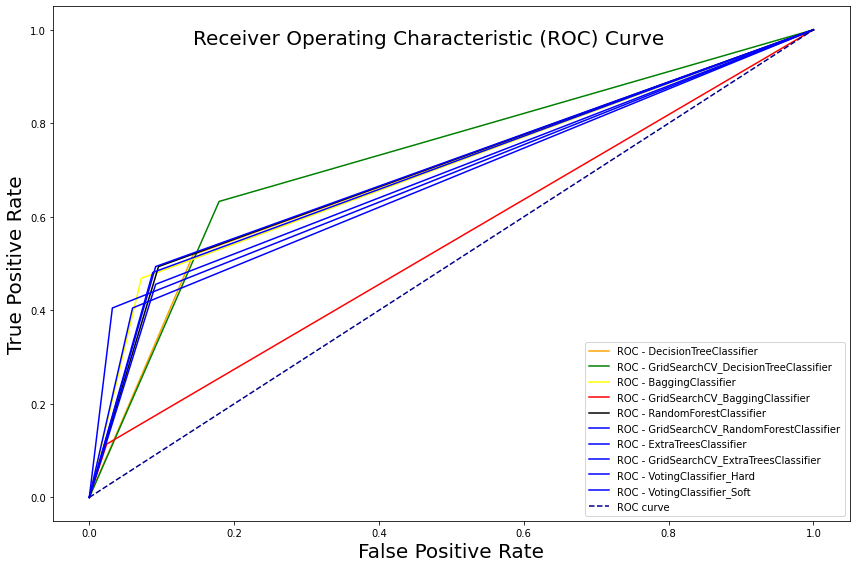

In [62]:
fpr_dict = {}
tpr_dict = {}
for i in range(10):
  if i in [0,1,2,3,4,5,6,7]:  
    model_pred = result_df['Trained Model'][i].predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, model_pred)
    fpr_dict[i] = fpr
    tpr_dict[i] = tpr
  else:        
    model_pred = result_df['Trained Model'][i].predict(X_test_Scaled)
    fpr, tpr, thresholds = roc_curve(y_test, model_pred)
    fpr_dict[i] = fpr
    tpr_dict[i] = tpr
plt.figure(figsize=(12,8))
plt.suptitle('\nReceiver Operating Characteristic (ROC) Curve', fontsize=20)
plt.plot(fpr_dict[0], tpr_dict[0], color='orange', label=f"ROC - {result_df['Model Name'][0]}")
plt.plot(fpr_dict[1], tpr_dict[1], color='green', label=f"ROC - {result_df['Model Name'][1]}")
plt.plot(fpr_dict[2], tpr_dict[2], color='yellow', label=f"ROC - {result_df['Model Name'][2]}")
plt.plot(fpr_dict[3], tpr_dict[3], color='red', label=f"ROC - {result_df['Model Name'][3]}")
plt.plot(fpr_dict[4], tpr_dict[4], color='black', label=f"ROC - {result_df['Model Name'][4]}")
plt.plot(fpr_dict[5], tpr_dict[5], color='blue', label=f"ROC - {result_df['Model Name'][5]}")
plt.plot(fpr_dict[6], tpr_dict[6], color='blue', label=f"ROC - {result_df['Model Name'][6]}")
plt.plot(fpr_dict[7], tpr_dict[7], color='blue', label=f"ROC - {result_df['Model Name'][7]}")
plt.plot(fpr_dict[8], tpr_dict[8], color='blue', label=f"ROC - {result_df['Model Name'][8]}")
plt.plot(fpr_dict[9], tpr_dict[9], color='blue', label=f"ROC - {result_df['Model Name'][9]}")

plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve')
plt.xlabel('False Positive Rate',fontdict={'fontsize': 20})
plt.ylabel('True Positive Rate',fontdict={'fontsize': 20})
plt.legend()
plt.show()

## Checking Best Model

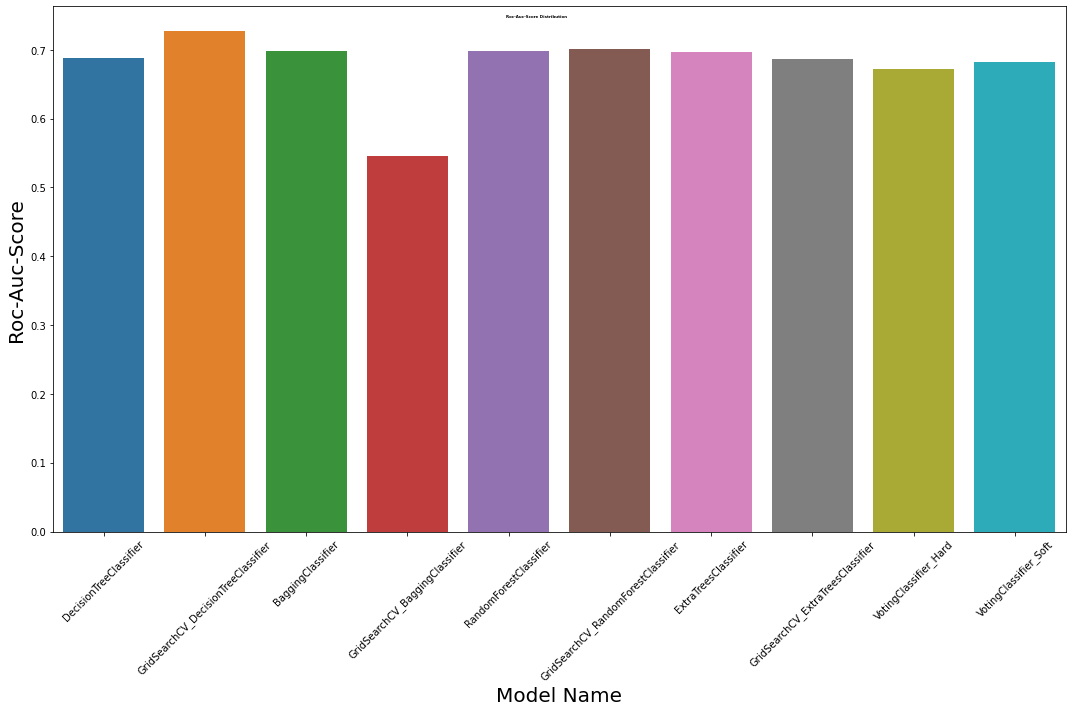

In [63]:
plt.figure(figsize=(15,10)) 
plt.suptitle('\nRoc-Auc-Score Distribution\n\n', fontsize=4, fontweight='bold')
sns.barplot(data=result_df, x='Model Name', y='AUC_Test')
plt.xlabel('Model Name',fontdict={'fontsize': 20})
plt.ylabel('Roc-Auc-Score',fontdict={'fontsize': 20})
plt.xticks(rotation=45)
plt.show()

In [64]:
Best_Model_Name = result_df['Trained Model'][result_df[result_df['AUC_Test'] == max(result_df['AUC_Test'])]['Trained Model'].index[0]]
Best_Model_Index = result_df['Trained Model'][result_df[result_df['AUC_Test'] == max(result_df['AUC_Test'])]['Trained Model'].index].index[0]
Best_Model_Name

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': range(1, 10),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(2, 10, 2),
                         'splitter': ['best', 'random']},
             verbose=2)

## Save Best Model

In [66]:
import pickle
Best_Trained_model = Best_Model_Name
with open('Census_Income_Classification.sav', 'wb') as best_model_pickle:
 pickle.dump(Best_Trained_model, best_model_pickle)